In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_acc_time = [304, 0.663]
ds_acc_time = [390, 0.6533]

In [ ]:
cifar_base_df = pd.read_csv("covid_base.txt", sep="\t", header=None)

In [12]:
cifar_acc_df = pd.read_csv("cifar_flower_acc.txt").iloc[:, 1]

cifar_acc_arr = []
for i in range(len(cifar_acc_df)):
    cur_val = float(cifar_acc_df[i][10:])
    cifar_acc_arr.append(cur_val)

In [13]:
cifar_time_df = pd.read_csv("cifar_flower_time.txt").iloc[:, 0]

cifar_time_arr = []
for i in range(len(cifar_time_df)):
    cur_val = float(cifar_time_df[i][5:])
    cifar_time_arr.append(cur_val)

for i in range(1, len(cifar_time_arr)):
    cifar_time_arr[i] = cifar_time_arr[i] - cifar_time_arr[0]

In [14]:
openfl_df = pd.read_csv("cifar_openfl.txt", header=None, sep="\t")
openfl_time_arr = np.array(openfl_df.iloc[:,0])
openfl_acc_arr = np.array(openfl_df.iloc[:,1])

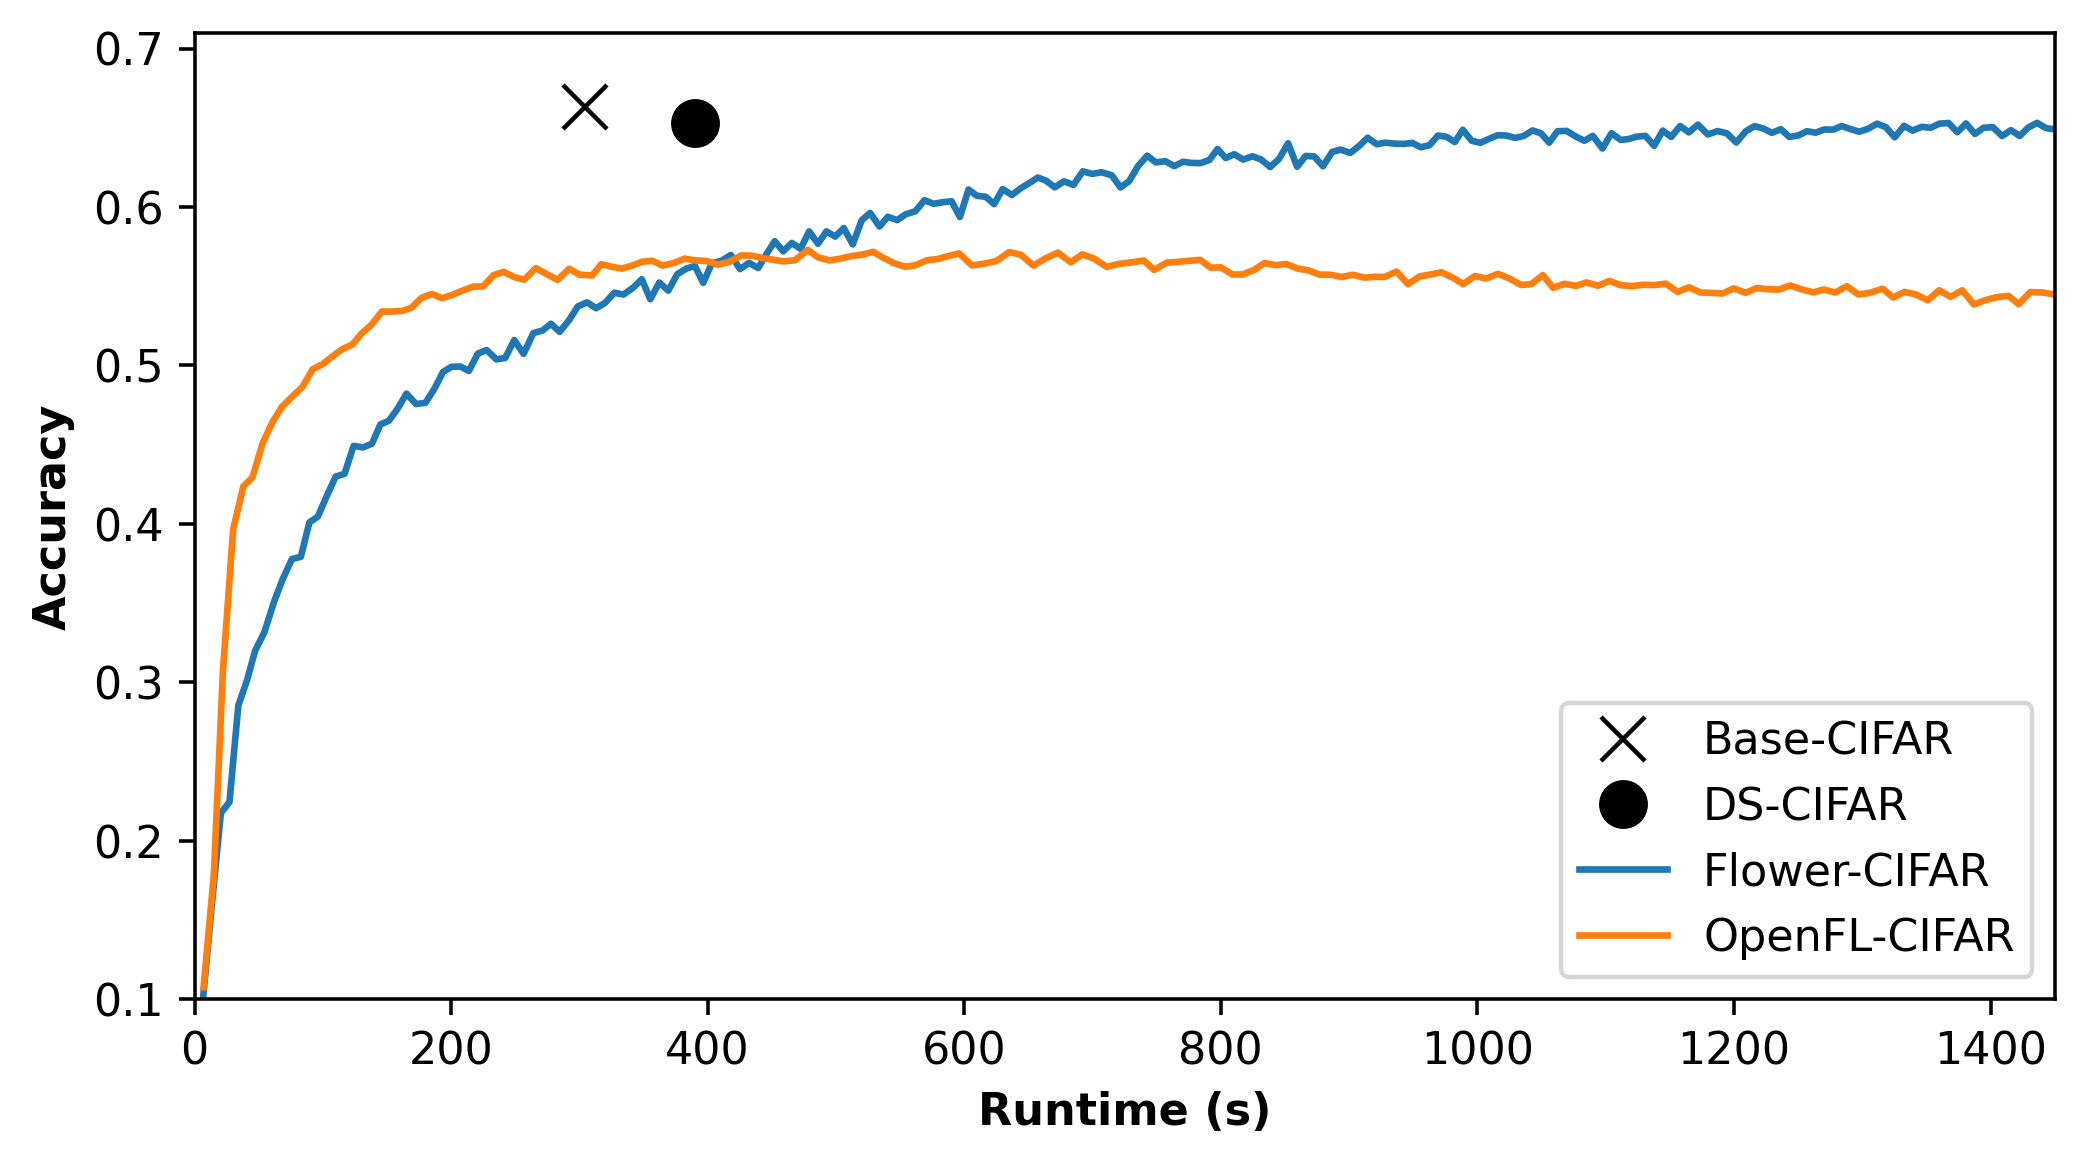

In [20]:
plt.figure(figsize=(7.5, 4), dpi=320)

plt.plot(base_acc_time[0],
         base_acc_time[1],
         marker='x',
         markersize=10,
         color="k",
         linewidth=0,
         label="Base-CIFAR")
plt.plot(ds_acc_time[0],
         ds_acc_time[1],
         marker='o',
         markersize=10,
         color="k",
         linewidth=0,
         label="DS-CIFAR")
plt.plot(cifar_time_arr[1:], cifar_acc_arr[1:], label="Flower-CIFAR")
plt.plot(openfl_time_arr, openfl_acc_arr, label="OpenFL-CIFAR")
plt.xlabel("Runtime (s)", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.legend()
plt.ylim([0.1, 0.71])
plt.xlim([0, 1450])
plt.savefig("cifar_8.pdf",
            facecolor="w",
            bbox_inches='tight',)